# [E-07]카메라 스티커앱 만들기 첫걸음

## Import

In [220]:
import cv2
import dlib

import numpy as np
import matplotlib.pyplot as plt

import os

### Image Read

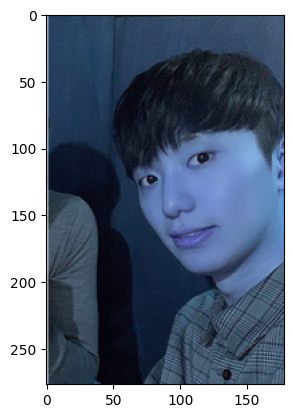

In [221]:
my_pace_path = os.getenv("homepath") + "/Desktop/python/exploration/exploration_11_29/m_pace.png"
img_bgr = cv2.imread(my_pace_path)

img_show = img_bgr.copy()

plt.imshow(img_bgr)
plt.show()

RGB 값이 아닌 BGR 값으로 초기 설정되어 푸른색 사진으로 나타남

### RGB 값으로 변환

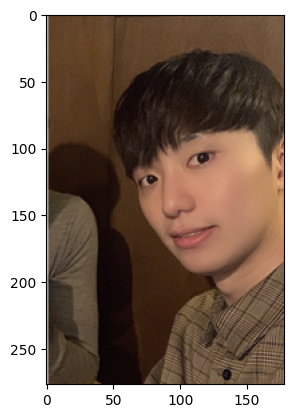

In [222]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

## 얼굴 검출 & 랜드마크 검출 하기

### Bounding Box 위치 확인

In [223]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(44, 80) (151, 187)]]


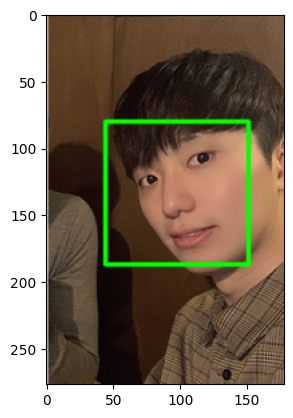

In [224]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    r = dlib_rect.right()
    t = dlib_rect.top()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

### Land Mark의 위치 확인

#### Model Read

In [225]:
model_path = os.getenv("homepath") + "/Desktop/python/exploration/exploration_11_29/shape_predictor_68_face_landmarks.dat"

landmark_model = dlib.shape_predictor(model_path)

In [226]:
list_landmark = []

for dlib_rect in dlib_rects:
    point = landmark_model(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), point.parts()))
    list_landmark.append(list_points)

print(len(list_landmark[0]))

68


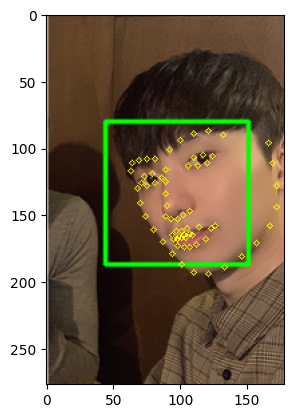

In [227]:
for landmark in list_landmark:
    for point_t in landmark:
        cv2.circle(img_show, point_t, 2, (0, 255, 255, -1)) # 3가지 RGB 값(색상선택 0, 255, 255 는 노란색), -1은 속내부 채워짐

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

##  스티커 적용 위치 확인하기

### 사진속 코의 좌표 확인

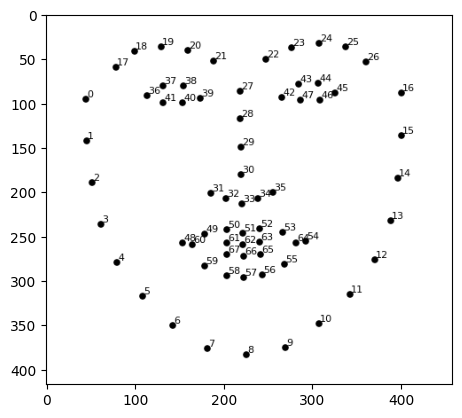

In [228]:
index_t = os.getenv("homepath") + "/Desktop/python/exploration/exploration_11_29/index_t.png"
index_t = cv2.imread(index_t)

plt.imshow(index_t)
plt.show()

In [229]:
for dlib_rect, landmark in zip(dlib_rects, list_landmark):
    print(landmark[33]) # 코의 index는 33 으로 확인
    x = landmark[33][0]
    y = landmark[33][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()

    print('(x,y) : ({0}, {1})'.format(x, y))
    print('(w,h) : ({0}, {1})'.format(w, h))

(98, 153)
(x,y) : (98, 99)
(w,h) : (108, 108)


### 스티커사진 Read

(108, 108, 3)


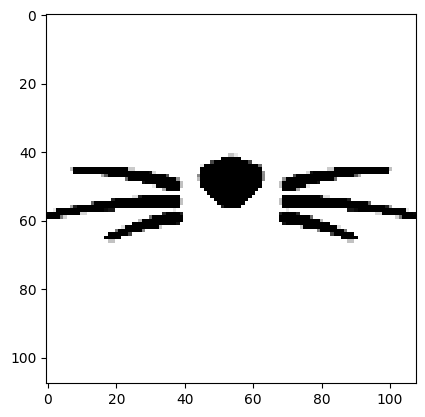

In [230]:
sticker_path = os.getenv("homepath") + "/Desktop/python/exploration/exploration_11_29/cat-whiskers.png"
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h)) # w,h 는 얼굴 영역의 가로를 차지하는 픽셀수(108)

print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

### 스티커 추가

In [231]:
refinde_x = x - w // 2
refinde_y = y - 5

print('(x,y) : {0},{1}'.format(refinde_x, refinde_y))

(x,y) : 44,94


In [232]:
# if refinde_x < 0:
#     img_sticker = img_sticker[:, -refinde_x:]
#     refinde_x = 0

# if refinde_y < 0:
#     img_sticker = img_sticker[-refinde_y:, :]
#     refinde_y = 0

# print('(x,y) : {0},{1}'.format(refinde_x, refinde_y))

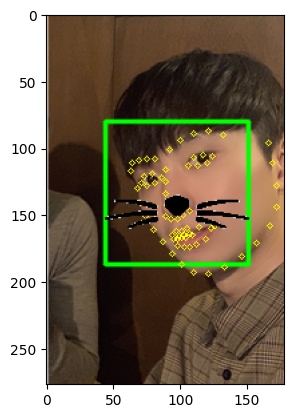

In [233]:
sticker_area = img_show[refinde_y:refinde_y+img_sticker.shape[0], refinde_x:refinde_x+img_sticker.shape[1]]
img_show[refinde_y:refinde_y+img_sticker.shape[0], refinde_x:refinde_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### Bounding Box와 Landmark 제거

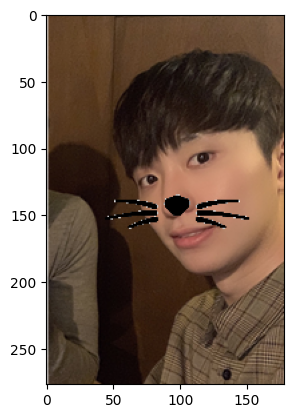

In [234]:
sticker_area = img_bgr[refinde_y:refinde_y+img_sticker.shape[0], refinde_x:refinde_x+img_sticker.shape[1]]
img_bgr[refinde_y:refinde_y+img_sticker.shape[0], refinde_x:refinde_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 사람이 아닌 동물로 진행한다면..?

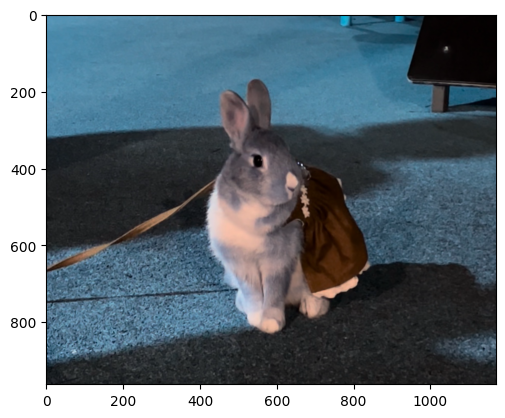

In [235]:
my_tony_path = os.getenv("homepath") + "/Desktop/tony/tony.png"
img_bgr = cv2.imread(my_tony_path)

img_show = img_bgr.copy()

plt.imshow(img_bgr)
plt.show()

### RGB 값 전환

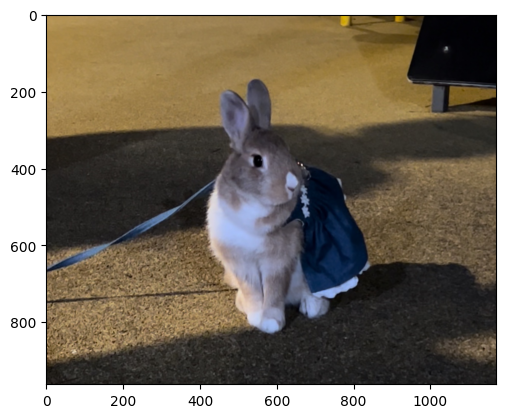

In [236]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

### Bounding Box 위치 확인

In [237]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

rectangles[]


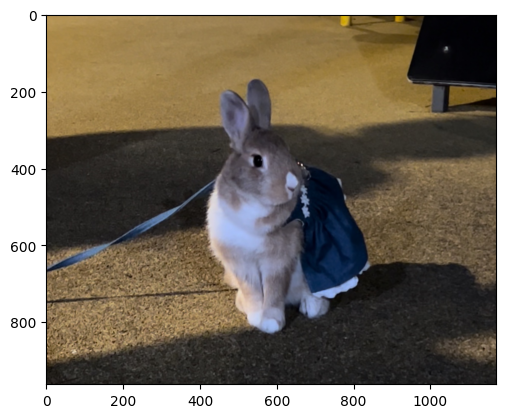

In [238]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    r = dlib_rect.right()
    t = dlib_rect.top()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

### Land Mark 위치 확인

In [239]:
model_path = os.getenv("homepath") + "/Desktop/python/exploration/exploration_11_29/shape_predictor_68_face_landmarks.dat"

landmark_model = dlib.shape_predictor(model_path)

In [240]:
list_landmark = []

for dlib_rect in dlib_rects:
    point = landmark_model(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), point.parts()))
    list_landmark.append(list_points)

# print(len(list_landmark[0]))

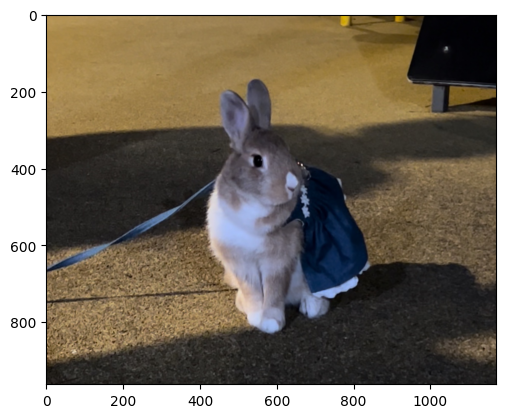

In [241]:
for landmark in list_landmark:
    for point_t in landmark:
        cv2.circle(img_show, point_t, 2, (0, 255, 255, -1)) # 3가지 RGB 값(색상선택 0, 255, 255 는 노란색), -1은 속내부 채워짐

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

### 스티커 붙이기...

In [242]:
refinde_x = 586
refinde_y = 392

print('(x,y) : {0},{1}'.format(refinde_x, refinde_y))

(x,y) : 586,392


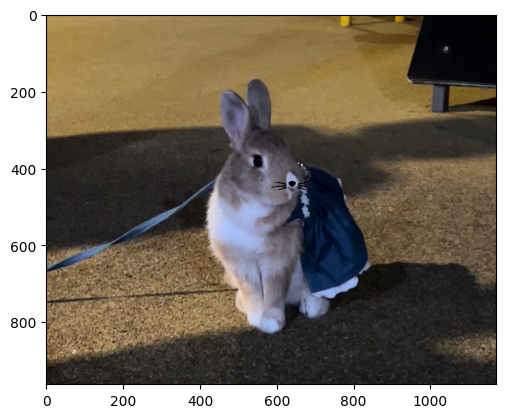

In [243]:
sticker_area = img_bgr[refinde_y:refinde_y+img_sticker.shape[0], refinde_x:refinde_x+img_sticker.shape[1]]
img_bgr[refinde_y:refinde_y+img_sticker.shape[0], refinde_x:refinde_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 스티커사진 추가

(108, 108, 3)


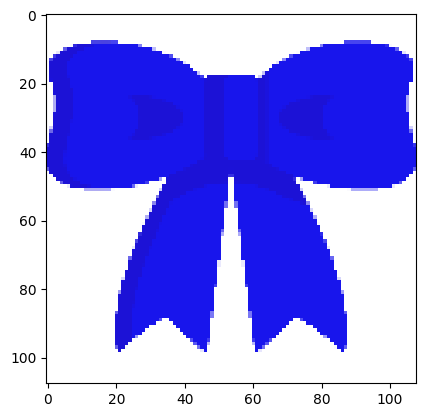

In [248]:
sticker_r_path = os.getenv("homepath") + "/Desktop/python/exploration/exploration_11_29/bow.png"
img_sticker = cv2.imread(sticker_r_path)
img_sticker = cv2.resize(img_sticker, (w, h)) # w,h 는 얼굴 영역의 가로를 차지하는 픽셀수(108)

print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

In [250]:
refinde_x = 436
refinde_y = 287

print('(x,y) : {0},{1}'.format(refinde_x, refinde_y))

(x,y) : 436,287


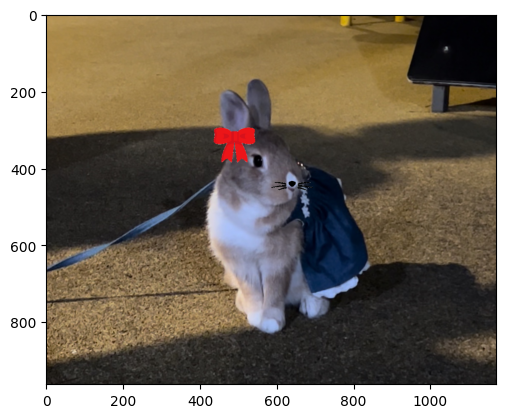

In [251]:
sticker_area = img_bgr[refinde_y:refinde_y+img_sticker.shape[0], refinde_x:refinde_x+img_sticker.shape[1]]
img_bgr[refinde_y:refinde_y+img_sticker.shape[0], refinde_x:refinde_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 결론...

동물은 Bounding Box 나 Land Mark 지정이 불가했다!

## Reference

Aiffel_EXPLORATION_GN5 노드 [7. 카메라 스티커앱 만들기 첫걸음] 설명 내용  
[flaticon](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1)  
그루원님들의 도움

## 회고

실수로 6번 프로젝트를 내질 못하고 난 뒤 바로 진행한 7번 프로젝트이며... 7번 프로젝트는 나름 재미있게 즐겼었던 프로젝트입니다.  
우선적으로 Bounding Box 와 Land Mark 시스템을 이용하며 사람 기준으로는 되어있지만 사람과 똑같이 코와 눈 그리고 얼굴형이 있다면  
동물도 가능할까..? 싶어서 기르던 토끼인 토니의 사진을 이용해봤으나 진행되지는 않았습니다.  
아무래도... 사람의 외형만을 캐치가 가능한것으로 확인되며 동물관련된 내용은 좀더 찾아보면 있을 것 같기도 한데... 아직은 찾지는 못했습니다.  
  
1. 스티커 구하기 or 만들기  
  
기존 노드에서 사용하라 예시로 나와있던 고양이코 스티커 사진을 이용했으며 정상적으로 image Read를 할 수 있었으며  
고양이코 스티커의 경우 RGB 값이 없기에 (흑백) 따로 convolution 작업을 진행하지 않았으며  
그와 반대로 리본 스티커사진의 경우엔 흑백이 아닌 RGB 값으로 되어 있어 convolution 작업을 진행해서 빨간 리본임을 확인했습니다.  
(추후에 스티커사진을 직접 붙였을땐 해당 사진은 파란색상으로 나왔으며 이유를 찾아보니 스티커사진 적용에서 BGR값을 RGB값으로 convolution 진행하는 내용이 있어 빨간리본 확인코드는 주석처리 진행했습니다.)  
  
2. 얼굴 검출 & 랜드마크 검출 하기  
  
사람의 얼굴의 경우 정면사진은 너무 정확하게 나올까 싶어 일부러 살짝 비튼 반측면..? 사진으로 준비해봤으며 반측면 사진으로도 정상적으로 Bounding Box 와 Land Mark 가 나오는것을  
확인할 수 있었습니다. 다만 Bounding Box 의 경우 노드에선 Box의 범위가 얼굴 옆라인까지 전부 들어가 있었으나 반측면 사진에선 얼굴 전체의 범위가 아니라  
코를 중점적으로 Box 범위를 형성하는걸 볼 수 있었습니다.  
이 부분에서 궁금한건 Box 범위를 넓히거나 할 순 없을테고... Box의 범위는 Land Mark의 코를 중앙을 기준으로 Box 범위를 형성하는가...? 하는 궁금증이 있었습니다.  
  
3. 스티커 적용 위치 확인하기  
  
처음에는 이게 무슨 사진인고.. 했지만 프로젝트를 진행하면서 사진의 의미에 대해서 알게되어 프로젝트 시 Index 로서 활용르 진행했습니다.  
  
4. 스티커 적용하기  
  
처음 np.where 의 img_sticker 의 값은 0으로 노드에 설명되어 있는대로 진행했었을 때엔 스티커사진이 투명화가 되질 않고 하얀 네모박스안에 있는 스티커 사진으로 출력이 됐으나  
0의 값을 255로 했을 때 정상적으로 투명화가 진행돼서 나오는것을 확인할 수 있었습니다. 이러한 결과값을 찾을 수 있었던건 그루님들에게 물어보고 찾게 되었으며 도와주신 그루님들에게 감사드립니다.  